In [1]:
!rm -rf /Users/gil-arnaudcoche/Documents/ijoutaku/data/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/*_gt

zsh:1: no matches found: /Users/gil-arnaudcoche/Documents/ijoutaku/data/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/*_gt


In [2]:
import sys
sys.path.insert(0, '/Users/gil-arnaudcoche/Documents/ijoutaku/')

import time
import keras
import numpy as np
import matplotlib.pyplot as plt

from config.paths import TEST_PATH
from config.paths import MODELS_PATH

from lib.generators import SequenceDataGenerator
from lib.generators import ForwardDataGenerator

In [3]:
LSTM_CONVOLUTIONAL_AUTOENCODER = f'{MODELS_PATH}lstm-convolutional-autoencoder.hdf5'
LSTM_CONVOLUTIONAL_AUTOENCODER_FORWARD = f'{MODELS_PATH}lstm-convolutional-autoencoder-forward.hdf5'
LSTM_AUTOENCODER_FORWARD = f'{MODELS_PATH}lstm-autoencoder-forward.hdf5'

In [4]:
lstm_convolutional_autoencoder = keras.models.load_model(LSTM_CONVOLUTIONAL_AUTOENCODER)
lstm_convolutional_autoencoder_forward = keras.models.load_model(LSTM_CONVOLUTIONAL_AUTOENCODER_FORWARD)
lstm_autoencoder_forward = keras.models.load_model(LSTM_AUTOENCODER_FORWARD)

In [5]:
sequence_test_set = SequenceDataGenerator(TEST_PATH)
forward_test_set = ForwardDataGenerator(TEST_PATH)

In [6]:
mse = keras.losses.MeanSquaredError()

In [7]:
b = 38
x = sequence_test_set[b][0][:, :, :, :, :]
x_predict = lstm_convolutional_autoencoder.predict(x)

1/1 [==============================] - 1s 697ms/step


In [8]:
mse_values = np.zeros(x.shape[1])
for t in range(x.shape[1]):
    mse_values[t] = mse(x[1, t, :, :, 0], x_predict[1, t, :, :, 0])

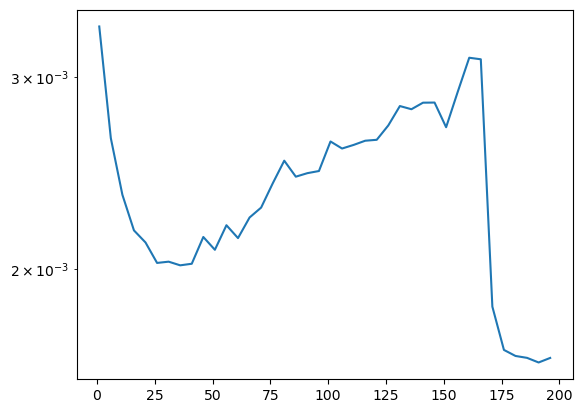

In [9]:
plt.plot(1 + np.arange(0, SequenceDataGenerator._SEQUENCE_SIZE, SequenceDataGenerator._STRIDE_KERNEL), mse_values)
plt.yscale('log')

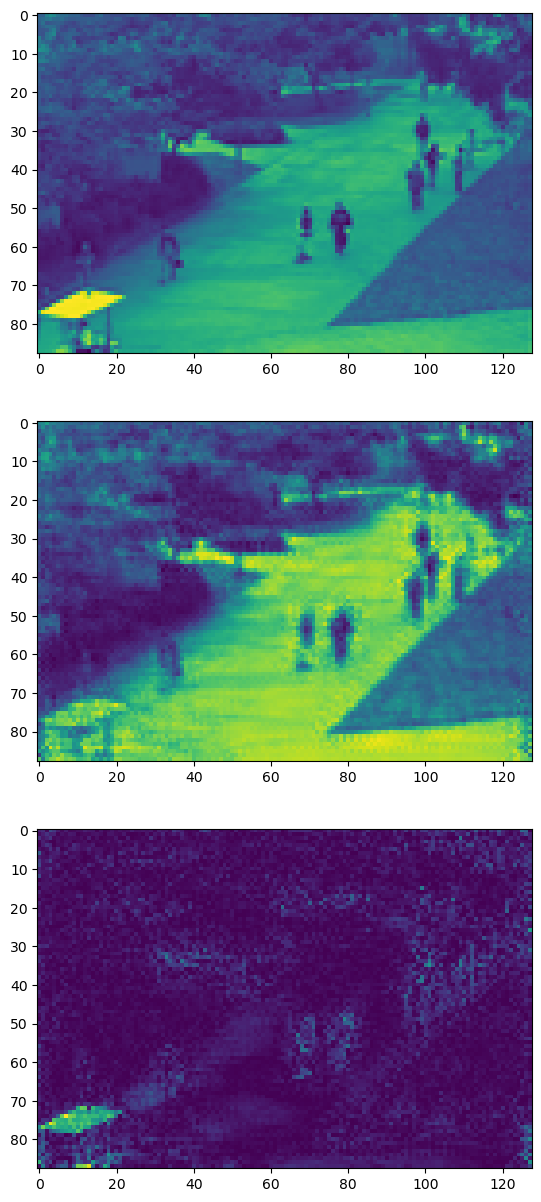

In [10]:
n = 33
img = x[1, n, :, :, 0]
img_predict = x_predict[1, n, :, :, 0]
plt.figure(figsize=(15, 15))
plt.subplot(311)
plt.imshow(img)
plt.subplot(312)
plt.imshow(img_predict)
plt.subplot(313)
plt.imshow(np.abs(img - img_predict))

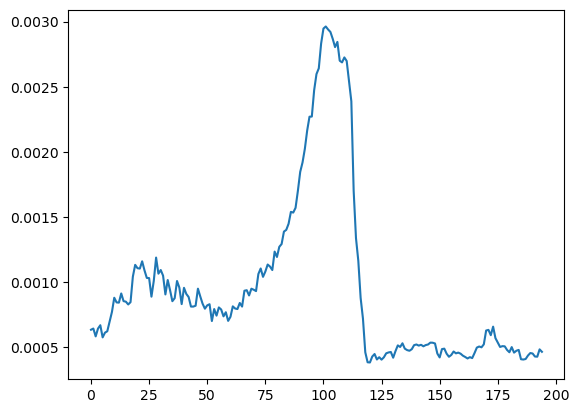

In [11]:
mse_values = np.zeros(195)
p = 0
for n in range(1690, 1755):
    X, y = forward_test_set[n]
    y_predict = lstm_autoencoder_forward(X)
    for k in range(y.shape[0]):
        mse_values[p] = mse(y[k, :, :, :], y_predict[k, :, :, :])
        p += 1
plt.plot(mse_values)

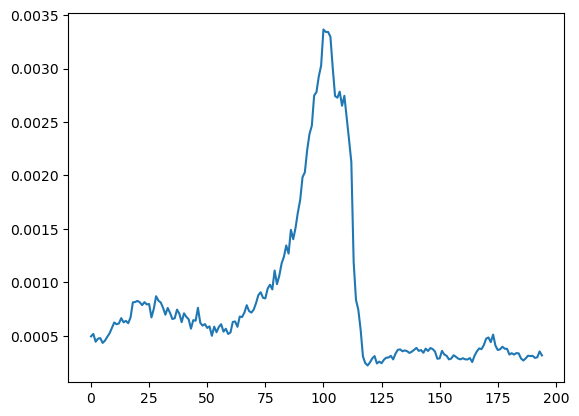

In [12]:
mse_values = np.zeros(195)
p = 0
for n in range(1690, 1755):
    X, y = forward_test_set[n]
    y_predict = lstm_convolutional_autoencoder_forward(X)
    for k in range(y.shape[0]):
        mse_values[p] = mse(y[k, :, :, :], y_predict[k, :, :, :])
        p += 1
plt.plot(mse_values)

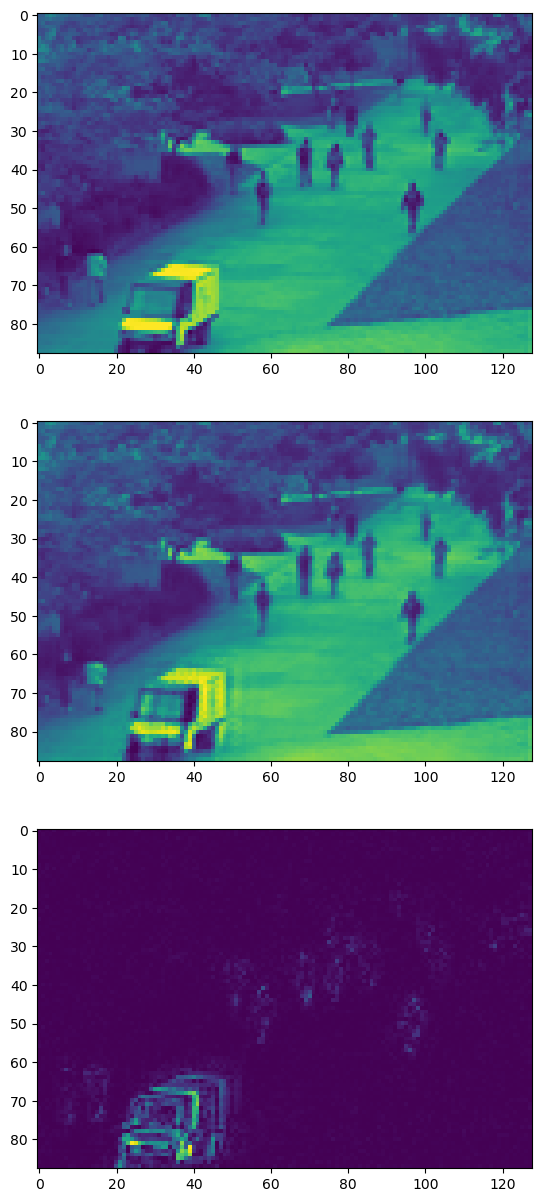

In [13]:
n = 1723
X, y = forward_test_set[n]
y_predict = lstm_convolutional_autoencoder_forward(X)
img = y[0, :, :, 0]
img_predict = y_predict[0, :, :, 0]
plt.figure(figsize=(15, 15))
plt.subplot(311)
plt.imshow(img)
plt.subplot(312)
plt.imshow(img_predict)
plt.subplot(313)
plt.imshow(np.abs(img - img_predict))

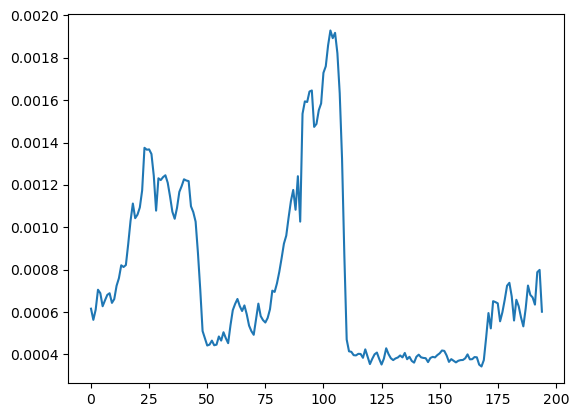

In [14]:
mse_values = np.zeros(195)
p = 0
for n in range(2015, 2080):
    X, y = forward_test_set[n]
    y_predict = lstm_autoencoder_forward(X)
    for k in range(y.shape[0]):
        mse_values[p] = mse(y[k, :, :, :], y_predict[k, :, :, :])
        p += 1
plt.plot(mse_values)

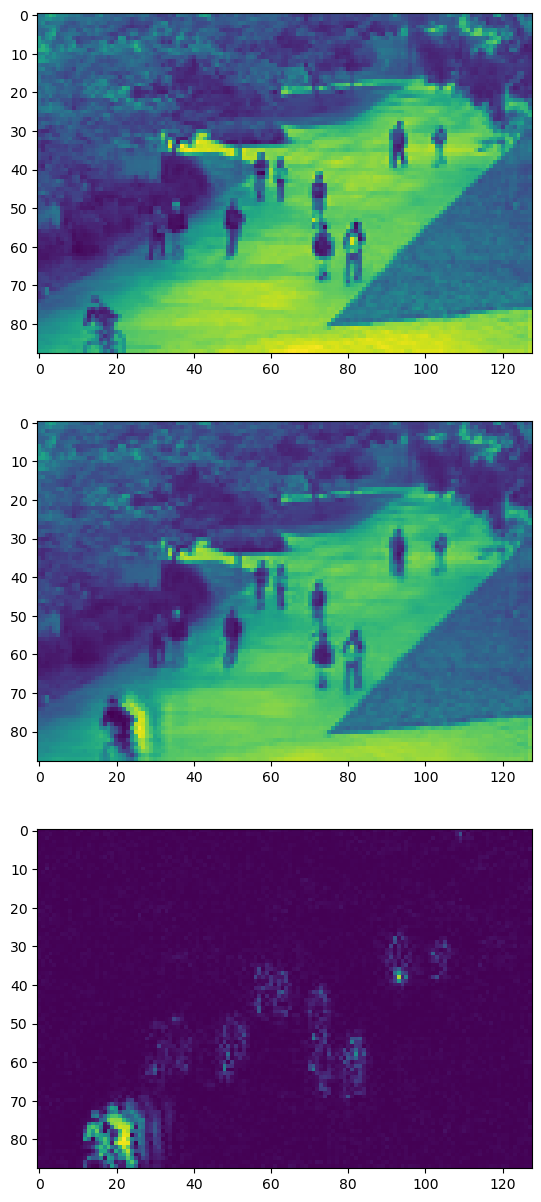

In [15]:
n = 2050
X, y = forward_test_set[n]
y_predict = lstm_convolutional_autoencoder_forward(X)
img = y[0, :, :, 0]
img_predict = y_predict[0, :, :, 0]
plt.figure(figsize=(15, 15))
plt.subplot(311)
plt.imshow(img)
plt.subplot(312)
plt.imshow(img_predict)
plt.subplot(313)
plt.imshow(np.abs(img - img_predict))